In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import skew
import os
import csv
import pandas as pd
from tqdm import tqdm

In [2]:
df = pd.read_csv("C:/Users/user/Desktop/abalone.csv")

In [3]:
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [6]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

Text(0, 0.5, 'Count')

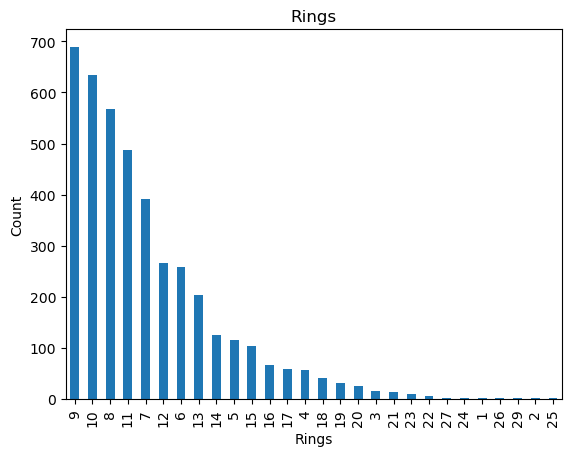

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 레이블별 갯수 확인
label_counts = df['Rings'].value_counts()

# 바 그래프 그리기
label_counts.plot(kind='bar')

# 그래프 제목 및 라벨 설정
plt.title('Rings')
plt.xlabel('Rings')
plt.ylabel('Count')

In [62]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'label' 컬럼을 숫자로 변환
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()
# 'label' 컬럼을 숫자로 변환
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [63]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [64]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [65]:
X=df.drop('Rings',axis=1)
X.head()

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [66]:
y=df['Rings']
y.value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [67]:
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [68]:
Y = pd.get_dummies(y).values

In [69]:
X = X.values

In [70]:
X

array([[0.000e+00, 2.000e+00, 4.550e-01, ..., 2.245e-01, 1.010e-01,
        1.500e-01],
       [1.000e+00, 2.000e+00, 3.500e-01, ..., 9.950e-02, 4.850e-02,
        7.000e-02],
       [2.000e+00, 0.000e+00, 5.300e-01, ..., 2.565e-01, 1.415e-01,
        2.100e-01],
       ...,
       [4.174e+03, 2.000e+00, 6.000e-01, ..., 5.255e-01, 2.875e-01,
        3.080e-01],
       [4.175e+03, 0.000e+00, 6.250e-01, ..., 5.310e-01, 2.610e-01,
        2.960e-01],
       [4.176e+03, 2.000e+00, 7.100e-01, ..., 9.455e-01, 3.765e-01,
        4.950e-01]])

In [71]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [72]:
from keras.utils import to_categorical
y_train_seq = to_categorical(y_train_seq)

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y,
                                                    test_size = 0.25, 
                                                    random_state = 21)

In [75]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3132, 9), (1045, 9), (3132, 28), (1045, 28))

In [76]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3132, 9), (1045, 9), (3132, 28), (1045, 28))

In [77]:
from collections import Counter
import numpy as np

def split_sequences(sequences, n_steps):
    X, y = list(), list()  # 빈 리스트를 생성하여 시퀀스 데이터와 레이블을 담을 공간을 만듦
    for i in range(len(sequences)):  # 전체 시퀀스 데이터를 순회
        # find the end of this pattern
        end_ix = i + n_steps  # 현재 인덱스(i)에서 n_steps만큼 떨어진 시퀀스의 끝을 계산
        # check if we are beyond the dataset
        if end_ix > len(sequences):  # 시퀀스 끝이 데이터의 범위를 넘어서는지 확인
            break  # 범위를 넘으면 루프 종료
        # gather input (X) and output parts (y)
        seq_x = sequences[i:end_ix, :-1]  # 입력 데이터 (특징 데이터)
        seq_y_values = sequences[i:end_ix, -1]  # 시퀀스 동안의 출력 데이터 (레이블들)
        
        # 가장 빈번하게 나온 레이블 찾기
        most_common_label = Counter(seq_y_values).most_common(1)[0][0]
        
        X.append(seq_x)  # 입력 데이터 추가
        y.append(most_common_label)  # 가장 많이 나온 레이블 추가
    
    return np.array(X), np.array(y)  # 리스트를 numpy 배열로 변환하여 반환

In [78]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

In [79]:
n_step = 3 

X_train_seq, y_train_seq = split_sequences(train_set, n_step)
print(X_train_seq.shape, y_train_seq.shape)

X_test_seq, y_test_seq = split_sequences(test_set, n_step)
print(X_test_seq.shape, y_test_seq.shape)

(3130, 3, 36) (3130,)
(1043, 3, 36) (1043,)


In [80]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

In [81]:
n_step = 3 

X_train_seq, y_train_seq = split_sequences(train_set, n_step)
print(X_train_seq.shape, y_train_seq.shape)

X_test_seq, y_test_seq = split_sequences(test_set, n_step)
print(X_test_seq.shape, y_test_seq.shape)

(3130, 3, 36) (3130,)
(1043, 3, 36) (1043,)


In [82]:
from keras.utils import to_categorical

# Convert output variables to categorical for CNN
y_train_seq = to_categorical(y_train_seq)
print(y_train_seq.shape)

y_test_seq = to_categorical(y_test_seq)
print(y_test_seq.shape)

(3130, 1)
(1043, 1)


In [83]:
# Convert output variables to categorical for CNN
y_train_seq = to_categorical(y_train_seq)
print(y_train_seq.shape)

y_test_seq = to_categorical(y_test_seq)
print(y_test_seq.shape)

(3130, 2)
(1043, 2)


In [84]:
# Produce variables for CNN input/output shape
n_timesteps, n_features, n_outputs = X_train_seq.shape[1], X_train_seq.shape[2], y_train_seq.shape[1]
print(n_timesteps, n_features, n_outputs)

3 36 2


In [85]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D


In [86]:
# Build CNN model using keras. For model building suggestions, referenced:
# https://machinelearningmastery.com/deep-learning-models-for-human-activity-recognition/
# https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
# https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/

# Sequential model type
model = Sequential()
model.add(LSTM(units=128, input_shape = (n_timesteps,n_features,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [87]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 128)               84480     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 2)                 258       
                                                                 
Total params: 101,250
Trainable params: 101,250
Non-trainable params: 0
_________________________________________________________________


In [88]:
history = model.fit(X_train_seq, y_train_seq, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

Epoch 1/20
89/89 [==============================] - 3s 12ms/step - loss: 0.0363 - accuracy: 0.9886 - val_loss: 1.7909e-05 - val_accuracy: 1.0000
Epoch 2/20
89/89 [==============================] - 0s 3ms/step - loss: 6.2032e-06 - accuracy: 1.0000 - val_loss: 2.1488e-06 - val_accuracy: 1.0000
Epoch 3/20
89/89 [==============================] - 0s 4ms/step - loss: 1.2999e-06 - accuracy: 1.0000 - val_loss: 8.4056e-07 - val_accuracy: 1.0000
Epoch 4/20
89/89 [==============================] - 0s 4ms/step - loss: 5.8885e-07 - accuracy: 1.0000 - val_loss: 4.7189e-07 - val_accuracy: 1.0000
Epoch 5/20
89/89 [==============================] - 0s 4ms/step - loss: 3.2961e-07 - accuracy: 1.0000 - val_loss: 2.5061e-07 - val_accuracy: 1.0000
Epoch 6/20
89/89 [==============================] - 0s 4ms/step - loss: 2.3668e-07 - accuracy: 1.0000 - val_loss: 1.4168e-07 - val_accuracy: 1.0000
Epoch 7/20
89/89 [==============================] - 0s 4ms/step - loss: 1.2243e-07 - accuracy: 1.0000 - val_loss: 1

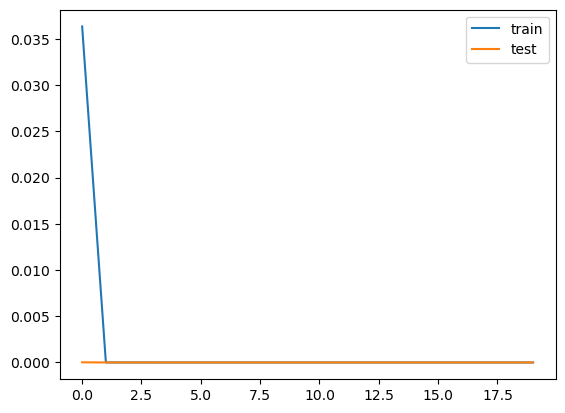

In [89]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()

In [91]:
model.evaluate(X_train_seq, y_train_seq)

98/98 [==============================] - 0s 2ms/step - loss: 7.6172e-10 - accuracy: 1.0000


[7.617205755039436e-10, 1.0]

In [92]:
model.evaluate(X_test_seq, y_test_seq)

33/33 [==============================] - 0s 2ms/step - loss: 5.7147e-10 - accuracy: 1.0000


[5.714729800487817e-10, 1.0]

33/33 [==============================] - 0s 2ms/step
Confusion Matrix


C:\Users\user\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


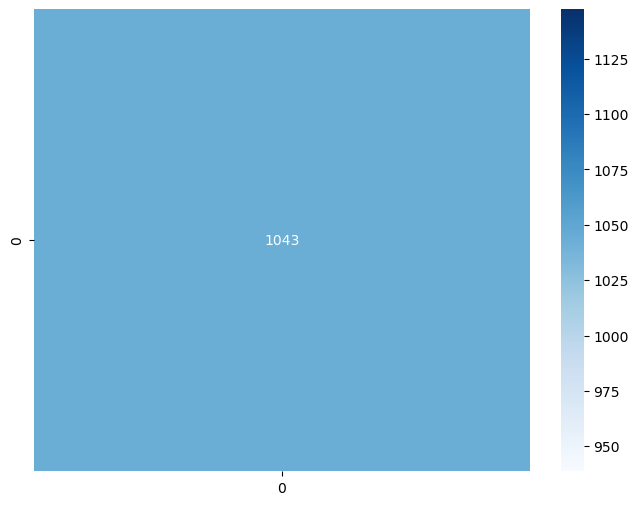

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test_seq, axis=1)
Y_pred = np.argmax(model.predict(X_test_seq),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# 그래프 표시
plt.show()

In [97]:
base_loss,base_accuracy=model.evaluate(X_test_seq, y_test_seq)

model_file="C:/Users/user/Desktop/2024 2학기/딥러닝 응용/4주차/RA_model.h5"
  
tf.keras.models.save_model(model, model_file, include_optimizer=False)
print('model saved at ', model_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

33/33 [==============================] - 0s 2ms/step - loss: 5.7147e-10 - accuracy: 1.0000
model saved at  C:/Users/user/Desktop/2024 2학기/딥러닝 응용/4주차/RA_model.h5
Accuracy >100.000000
Base Loss >0.00


In [98]:
# Build CNN model using keras. For model building suggestions, referenced:
# https://machinelearningmastery.com/deep-learning-models-for-human-activity-recognition/
# https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
# https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/

# Sequential model type
model2 = Sequential()
model2.add(LSTM(units=128, input_shape = (n_timesteps,n_features)))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(n_outputs, activation='softmax'))
model2.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [99]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 128)               84480     
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 2)                 258       
                                                                 
Total params: 101,250
Trainable params: 101,250
Non-trainable params: 0
_________________________________________________________________


In [101]:
history2 = model2.fit(X_train_seq, y_train_seq, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

Epoch 1/20
89/89 [==============================] - 3s 9ms/step - loss: 0.0159 - accuracy: 1.0000 - val_loss: 6.1976e-05 - val_accuracy: 1.0000
Epoch 2/20
89/89 [==============================] - 0s 4ms/step - loss: 3.4652e-05 - accuracy: 1.0000 - val_loss: 2.0446e-05 - val_accuracy: 1.0000
Epoch 3/20
89/89 [==============================] - 0s 4ms/step - loss: 1.0339e-05 - accuracy: 1.0000 - val_loss: 2.1408e-06 - val_accuracy: 1.0000
Epoch 4/20
89/89 [==============================] - 0s 4ms/step - loss: 9.3518e-07 - accuracy: 1.0000 - val_loss: 5.2521e-07 - val_accuracy: 1.0000
Epoch 5/20
89/89 [==============================] - 0s 4ms/step - loss: 3.0790e-07 - accuracy: 1.0000 - val_loss: 2.6813e-07 - val_accuracy: 1.0000
Epoch 6/20
89/89 [==============================] - 0s 4ms/step - loss: 1.5315e-07 - accuracy: 1.0000 - val_loss: 1.4244e-07 - val_accuracy: 1.0000
Epoch 7/20
89/89 [==============================] - 0s 3ms/step - loss: 1.2437e-07 - accuracy: 1.0000 - val_loss: 1.

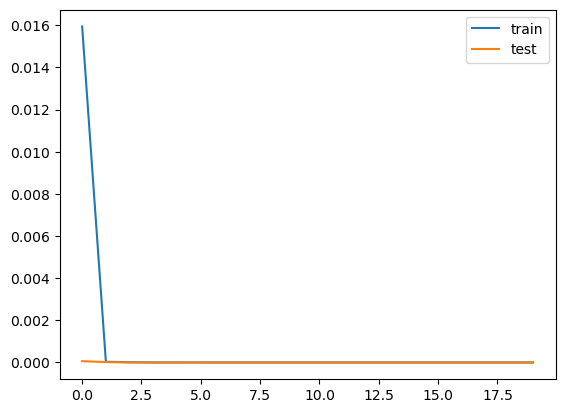

In [102]:
plt.plot(history2.history["loss"], label = "train")
plt.plot(history2.history["val_loss"], label = "test")
plt.legend()

In [103]:
model2.evaluate(X_train_seq, y_train_seq)

98/98 [==============================] - 0s 1ms/step - loss: 1.4473e-09 - accuracy: 1.0000


[1.4472687492883551e-09, 1.0]

In [104]:
model2.evaluate(X_test_seq, y_test_seq)

33/33 [==============================] - 0s 2ms/step - loss: 1.0287e-09 - accuracy: 1.0000


[1.0286513862922675e-09, 1.0]

33/33 [==============================] - 0s 2ms/step
Confusion Matrix


C:\Users\user\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


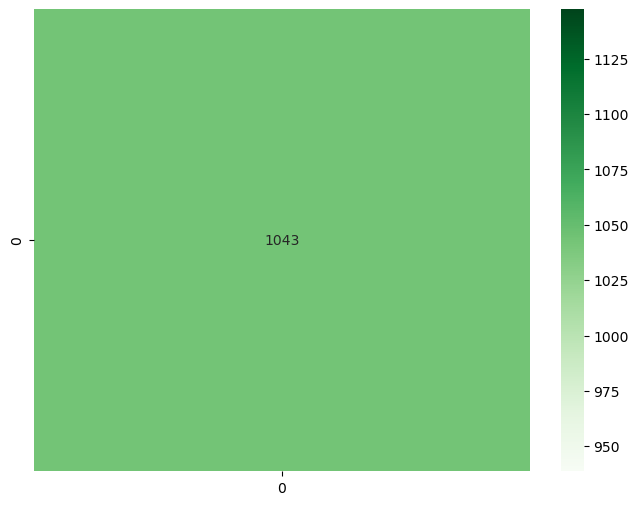

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test_seq_LA, axis=1)
Y_pred = np.argmax(model2.predict(X_test_seq_LA),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")

# 그래프 표시
plt.show()

In [112]:
base_loss,base_accuracy=model2.evaluate(X_test_seq, y_test_seq)

model_file2="C:/Users/user/Desktop/2024 2학기/딥러닝 응용/4주차/Model.h5"
  
tf.keras.models.save_model(model2, model_file2, include_optimizer=False)
print('model saved at ', model_file2)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

33/33 [==============================] - 0s 2ms/step - loss: 1.0287e-09 - accuracy: 1.0000
model saved at  C:/Users/user/Desktop/2024 2학기/딥러닝 응용/4주차/Model.h5
Accuracy >100.000000
Base Loss >0.00


<font size="7">전이 학습 및 미세 조정 </font>

In [113]:
# https://www.tensorflow.org/guide/keras/transfer_learning?hl=ko

In [114]:
# Base 모델을 로드 (LA_Model.h5)
from tensorflow.keras.models import load_model

base_model = load_model(model_file2)

In [115]:
base_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
base_model.evaluate(X_test_seq, y_test_seq)

33/33 [==============================] - 1s 2ms/step - loss: 1.0287e-09 - accuracy: 1.0000


[1.0286513862922675e-09, 1.0]

In [116]:
base_model.evaluate(X_test_seq, y_test_seq)

33/33 [==============================] - 0s 2ms/step - loss: 1.0287e-09 - accuracy: 1.0000


[1.0286513862922675e-09, 1.0]

In [117]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  3


### 기존의 출력층을 빼고 새로운 모델에 해당 레이어들 추가

In [122]:
# 기존 모델의 층을 동결 (학습되지 않도록 설정)
base_model.trainable = False

from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

def remove_last_layers(model, num_layers_to_remove):
    # 모델의 레이어를 하나씩 슬라이스해서 앞의 레이어만 가져옴
    model_layers = model.layers[:-num_layers_to_remove]  # 마지막 레이어부터 지정된 갯수만큼 제외
    new_model = models.Sequential(model_layers)  # 새로운 모델에 해당 레이어들만 추가
    return new_model


# 출력층부터 1개의 레이어를 삭제
new_model = remove_last_layers(base_model, 1)

# 새로운 출력층 추가
new_model.add(layers.Dense(256, activation='relu'))
new_model.add(layers.Dense(2, activation='softmax'))  # 예: 10개의 클래스
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# 모델 요약 출력
new_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 128)               84480     
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 256)               33024     
                                                                 
 dense_11 (Dense)            (None, 2)                 514       
                                                                 
Total params: 134,530
Trainable params: 33,538
Non-trainable params: 100,992
_________________________________________________________________


In [123]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.layers.rnn.lstm.LSTM object at 0x000001...,lstm_4,False
1,<keras.layers.core.dense.Dense object at 0x000...,dense_6,False
2,<keras.layers.core.dense.Dense object at 0x000...,dense_10,True
3,<keras.layers.core.dense.Dense object at 0x000...,dense_11,True


In [124]:
history3 = new_model.fit(X_train_seq, y_train_seq, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
89/89 [==============================] - 2s 8ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.3741e-06 - val_accuracy: 1.0000
Epoch 2/20
89/89 [==============================] - 0s 3ms/step - loss: 3.7371e-07 - accuracy: 1.0000 - val_loss: 1.4663e-07 - val_accuracy: 1.0000
Epoch 3/20
89/89 [==============================] - 0s 2ms/step - loss: 6.3477e-08 - accuracy: 1.0000 - val_loss: 1.5615e-08 - val_accuracy: 1.0000
Epoch 4/20
89/89 [==============================] - 0s 3ms/step - loss: 3.4277e-09 - accuracy: 1.0000 - val_loss: 1.0283e-08 - val_accuracy: 1.0000
Epoch 5/20
89/89 [==============================] - 0s 3ms/step - loss: 2.1159e-09 - accuracy: 1.0000 - val_loss: 7.6172e-09 - val_accuracy: 1.0000
Epoch 6/20
89/89 [==============================] - 0s 3ms/step - loss: 1.5658e-09 - accuracy: 1.0000 - val_loss: 6.0938e-09 - val_accuracy: 1.0000
Epoch 7/20
89/89 [==============================] - 0s 3ms/step - loss: 1.2272e-09 - accuracy: 1.0000 - val_loss: 4.

In [127]:
new_model.evaluate(X_test_seq, y_test_seq)

33/33 [==============================] - 0s 2ms/step - loss: 1.1429e-10 - accuracy: 1.0000


[1.1429460849976536e-10, 1.0]

미세조정

In [128]:
base_model.trainable = True
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [129]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.layers.rnn.lstm.LSTM object at 0x000001...,lstm_4,True
1,<keras.layers.core.dense.Dense object at 0x000...,dense_6,True
2,<keras.layers.core.dense.Dense object at 0x000...,dense_10,True
3,<keras.layers.core.dense.Dense object at 0x000...,dense_11,True


In [130]:
history3 = new_model.fit(X_train_seq, y_train_seq, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
89/89 [==============================] - 2s 9ms/step - loss: 1.6927e-10 - accuracy: 1.0000 - val_loss: 7.6172e-10 - val_accuracy: 1.0000
Epoch 2/20
89/89 [==============================] - 0s 4ms/step - loss: 8.4636e-11 - accuracy: 1.0000 - val_loss: 7.6172e-10 - val_accuracy: 1.0000
Epoch 3/20
89/89 [==============================] - 0s 4ms/step - loss: 8.4636e-11 - accuracy: 1.0000 - val_loss: 3.8086e-10 - val_accuracy: 1.0000
Epoch 4/20
89/89 [==============================] - 0s 4ms/step - loss: 4.2318e-11 - accuracy: 1.0000 - val_loss: 3.8086e-10 - val_accuracy: 1.0000
Epoch 5/20
89/89 [==============================] - 0s 4ms/step - loss: 4.2318e-11 - accuracy: 1.0000 - val_loss: 3.8086e-10 - val_accuracy: 1.0000
Epoch 6/20
89/89 [==============================] - 0s 4ms/step - loss: 4.2318e-11 - accuracy: 1.0000 - val_loss: 3.8086e-10 - val_accuracy: 1.0000
Epoch 7/20
89/89 [==============================] - 0s 4ms/step - loss: 4.2318e-11 - accuracy: 1.0000 - val_loss

In [131]:
new_model.evaluate(X_test_seq, y_test_seq)

33/33 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

## 2. RA모델을 불러서 LA에 맞추어라

In [132]:
# Base 모델을 로드 (LA_Model.h5)
from tensorflow.keras.models import load_model

base_model = load_model(model_file)

In [133]:
base_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
base_model.evaluate(X_test_seq, y_test_seq)

33/33 [==============================] - 1s 2ms/step - loss: 5.7147e-10 - accuracy: 1.0000


[5.714729800487817e-10, 1.0]

In [134]:
base_model.evaluate(X_test_seq, y_test_seq)

33/33 [==============================] - 0s 2ms/step - loss: 5.7147e-10 - accuracy: 1.0000


[5.714729800487817e-10, 1.0]

In [135]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  3


In [136]:
# 기존 모델의 층을 동결 (학습되지 않도록 설정)
base_model.trainable = False

In [140]:

# 기존 모델의 층을 동결 (학습되지 않도록 설정)
base_model.trainable = False

from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

def remove_last_layers(model, num_layers_to_remove):
    # 모델의 레이어를 하나씩 슬라이스해서 앞의 레이어만 가져옴
    model_layers = model.layers[:-num_layers_to_remove]  # 마지막 레이어부터 지정된 갯수만큼 제외
    new_model = models.Sequential(model_layers)  # 새로운 모델에 해당 레이어들만 추가
    return new_model


# 출력층부터 1개의 레이어를 삭제
new_model = remove_last_layers(base_model, 1)

# 새로운 출력층 추가
new_model.add(layers.Dense(256, activation='relu'))
new_model.add(layers.Dense(2, activation='softmax'))  # 예: 10개의 클래스
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# 모델 요약 출력
new_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 128)               84480     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 256)               33024     
                                                                 
 dense_15 (Dense)            (None, 2)                 514       
                                                                 
Total params: 134,530
Trainable params: 33,538
Non-trainable params: 100,992
_________________________________________________________________


In [141]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.layers.rnn.lstm.LSTM object at 0x000001...,lstm_3,False
1,<keras.layers.core.dense.Dense object at 0x000...,dense_4,False
2,<keras.layers.core.dense.Dense object at 0x000...,dense_14,True
3,<keras.layers.core.dense.Dense object at 0x000...,dense_15,True


In [142]:
history3 = new_model.fit(X_train_seq, y_train_seq, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
89/89 [==============================] - 2s 8ms/step - loss: 0.0342 - accuracy: 0.9773 - val_loss: 1.2268e-06 - val_accuracy: 1.0000
Epoch 2/20
89/89 [==============================] - 0s 2ms/step - loss: 4.8589e-07 - accuracy: 1.0000 - val_loss: 2.4375e-07 - val_accuracy: 1.0000
Epoch 3/20
89/89 [==============================] - 0s 2ms/step - loss: 1.3487e-07 - accuracy: 1.0000 - val_loss: 1.2188e-07 - val_accuracy: 1.0000
Epoch 4/20
89/89 [==============================] - 0s 4ms/step - loss: 5.6664e-08 - accuracy: 1.0000 - val_loss: 4.1895e-09 - val_accuracy: 1.0000
Epoch 5/20
89/89 [==============================] - 0s 3ms/step - loss: 6.7708e-10 - accuracy: 1.0000 - val_loss: 2.6660e-09 - val_accuracy: 1.0000
Epoch 6/20
89/89 [==============================] - 0s 3ms/step - loss: 5.0781e-10 - accuracy: 1.0000 - val_loss: 2.2852e-09 - val_accuracy: 1.0000
Epoch 7/20
89/89 [==============================] - 0s 3ms/step - loss: 4.6550e-10 - accuracy: 1.0000 - val_loss: 1.

In [143]:
new_model.evaluate(X_test_seq, y_test_seq)

33/33 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

미세조정

In [144]:
base_model.trainable = True
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [145]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.layers.rnn.lstm.LSTM object at 0x000001...,lstm_3,True
1,<keras.layers.core.dense.Dense object at 0x000...,dense_4,True
2,<keras.layers.core.dense.Dense object at 0x000...,dense_14,True
3,<keras.layers.core.dense.Dense object at 0x000...,dense_15,True


In [146]:
history3 = new_model.fit(X_train_seq, y_train_seq, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
89/89 [==============================] - 3s 9ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.8086e-10 - val_accuracy: 1.0000
Epoch 2/20
89/89 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
89/89 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
89/89 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
89/89 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
89/89 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
89/89 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss

In [147]:
new_model.evaluate(X_test_seq, y_test_seq)

33/33 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]